# **Airline Sentiment Analysis Project**

## **Table of Contents**
1. [Overview](#1-overview)
2. [Objectives](#2-objectives)
3. [Dataset](#3-dataset)
4. [Methodology](#4-methodology)
   - [4.1 Data Preprocessing](#41-data-preprocessing)
   - [4.2 Sentiment Analysis](#42-sentiment-analysis)
   - [4.3 Time Zone Standardization](#43-time-zone-standardization)
   - [4.4 Visualization](#44-visualization)
5. [Key Insights](#5-key-insights)
6. [Visualizations](#6-visualizations)
7. [Tools and Technologies](#7-tools-and-technologies)
8. [Recommendations](#8-recommendations)
9. [Project Files](#9-project-files)
10. [How to Use](#10-how-to-use)
11. [Contact](#11-contact)

---

## **1. Overview**
This project analyzes customer sentiment towards various airlines using Twitter data. It provides insights into:
- **Sentiment Trends Over Time**: Tracking customer sentiment on airlines.
- **Sentiment Distribution**: Comparison of positive, negative, and neutral feedback across airlines.
- **Common Themes**: Key topics driving sentiment (positive and negative).

---

## **2. Objectives**
- Perform sentiment analysis on customer tweets to understand airline reputation.
- Identify patterns and trends in feedback to provide actionable insights.
- Create visualizations to communicate findings effectively.

---

## **3. Dataset**
- **Source**: Twitter data collected using a pre-existing dataset. To view [Click Here](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)
- **Key Columns**:
  - `tweet_id`: Unique identifier for each tweet.
  - `airline_sentiment`: Sentiment category (positive, neutral, negative).
  - `negativereason`: Reason for negative sentiment.
  - `airline`: The airline associated with the tweet.
  - `tweet_created`: Timestamp when the tweet was posted.
  - Additional columns include `Cleaned_Tweet`, `Sentiment`, and `tweet_created_central`.

---

## **4. Methodology**

### **4.1 Data Preprocessing**
- Removed irrelevant characters (e.g., URLs, mentions).
- Tokenized tweets and removed stop words for analysis.
- Cleaned and normalized data for sentiment analysis.

In [1]:
# Install textblob
!pip install textblob

In [2]:
# Import librarires
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
import pytz
import seaborn as sns
from datetime import datetime
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


In [3]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\patto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
data = pd.read_csv("Tweets Project/Tweets.csv")

In [5]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
data.shape

(14640, 15)

In [7]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [8]:
data["user_timezone"].unique()

array(['Eastern Time (US & Canada)', 'Pacific Time (US & Canada)',
       'Central Time (US & Canada)', 'America/New_York',
       'Atlantic Time (Canada)', 'Quito', nan,
       'Mountain Time (US & Canada)', 'Vienna', 'Caracas', 'Kuala Lumpur',
       'Brisbane', 'Arizona', 'London', 'Tehran', 'Alaska', 'Sydney',
       'Irkutsk', 'Santiago', 'Amsterdam', 'Tijuana', 'Abu Dhabi',
       'Central America', 'Edinburgh', 'Jerusalem', 'Hawaii', 'Paris',
       'Guam', 'New Delhi', 'Stockholm', 'America/Chicago', 'Berlin',
       'Madrid', 'Athens', 'Brussels', 'Taipei', 'Rome', 'Beijing',
       'Mexico City', 'Bern', 'Singapore', 'Indiana (East)', 'Melbourne',
       'Saskatchewan', 'Casablanca', 'Brasilia', 'Kyiv', 'Bucharest',
       'Greenland', 'Prague', 'New Caledonia', 'Bogota', 'Seoul',
       'Sarajevo', 'Wellington', 'Bangkok', 'Warsaw', 'Copenhagen',
       'Hong Kong', 'Guadalajara', 'Mid-Atlantic', 'Mazatlan',
       'Buenos Aires', 'America/Los_Angeles', 'Dublin', 'Lisbon',
 

In [9]:
data["airline"].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [10]:
data.rename(columns = {"text": "Tweets"}, inplace=True)
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'Tweets', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [11]:
# Make sure there are no missing values for the tweets
data["Tweets"].isnull().sum()

0

In [12]:
# Create a new column for cleaned tweets
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_words)

data["Cleaned_Tweet"] = data["Tweets"].apply(clean_text)

In [13]:
data["Cleaned_Tweet"].head()

0                                                 said
1        plus youve added commercials experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: Cleaned_Tweet, dtype: object

In [14]:
# Analyze sentiment and creating a new Sentiment column to confirm polority of the tweets
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"

data["Sentiment"] = data["Cleaned_Tweet"].apply(analyze_sentiment)

### **4.3 Time Zone Standardization**
- Converted `tweet_created` timestamps to Central Time for uniformity.

In [15]:
data["tweet_created"] = pd.to_datetime(data["tweet_created"], format='%Y-%m-%d %H:%M:%S %z')

# Function to convert times based on 'user_timezone'
def convert_to_central(tweet_time, user_tz):
    try:
        # Timezone mapping for user timezone
        timezone_mapping = {
            'Eastern Time (US & Canada)': 'US/Eastern',
            'Pacific Time (US & Canada)': 'US/Pacific',
            'Central Time (US & Canada)': 'US/Central',
            'America/New_York': 'US/Eastern',
            'Atlantic Time (Canada)': 'Canada/Atlantic',
            'Quito': 'America/Guayaquil',
            'nan': None,
            'Mountain Time (US & Canada)': 'US/Mountain',
            'Vienna': 'Europe/Vienna',
            'Caracas': 'America/Caracas',
            'Kuala Lumpur': 'Asia/Kuala_Lumpur',
            'Brisbane': 'Australia/Brisbane',
            'Arizona': 'US/Arizona',
            'London': 'Europe/London',
            'Tehran': 'Asia/Tehran',
            'Alaska': 'US/Alaska',
            'Sydney': 'Australia/Sydney',
            'Irkutsk': 'Asia/Irkutsk',
            'Santiago': 'Chile/Continental',
            'Amsterdam': 'Europe/Amsterdam',
            'Tijuana': 'America/Tijuana',
            'Abu Dhabi': 'Asia/Dubai',
            'Central America': 'America/Guatemala',
            'Edinburgh': 'Europe/London',  # Edinburgh shares timezone with London
            'Jerusalem': 'Asia/Jerusalem',
            'Hawaii': 'US/Hawaii',
            'Paris': 'Europe/Paris',
            'Guam': 'Pacific/Guam',
            'New Delhi': 'Asia/Kolkata',
            'Stockholm': 'Europe/Stockholm',
            'America/Chicago': 'US/Central',
            'Berlin': 'Europe/Berlin',
            'Madrid': 'Europe/Madrid',
            'Athens': 'Europe/Athens',
            'Brussels': 'Europe/Brussels',
            'Taipei': 'Asia/Taipei',
            'Rome': 'Europe/Rome',
            'Beijing': 'Asia/Shanghai',  # Beijing shares timezone with Shanghai
            'Mexico City': 'America/Mexico_City',
            'Bern': 'Europe/Zurich',
            'Singapore': 'Asia/Singapore',
            'Indiana (East)': 'US/Eastern',
            'Melbourne': 'Australia/Melbourne',
            'Saskatchewan': 'America/Regina',
            'Casablanca': 'Africa/Casablanca',
            'Brasilia': 'America/Sao_Paulo',
            'Kyiv': 'Europe/Kiev',
            'Bucharest': 'Europe/Bucharest',
            'Greenland': 'America/Godthab',
            'Prague': 'Europe/Prague',
            'New Caledonia': 'Pacific/Noumea',
            'Bogota': 'America/Bogota',
            'Seoul': 'Asia/Seoul',
            'Sarajevo': 'Europe/Sarajevo',
            'Wellington': 'Pacific/Auckland',
            'Bangkok': 'Asia/Bangkok',
            'Warsaw': 'Europe/Warsaw',
            'Copenhagen': 'Europe/Copenhagen',
            'Hong Kong': 'Asia/Hong_Kong',
            'Guadalajara': 'America/Mexico_City',  # Same as Mexico City
            'Mid-Atlantic': 'America/Noronha',
            'Mazatlan': 'America/Mazatlan',
            'Buenos Aires': 'America/Argentina/Buenos_Aires',
            'America/Los_Angeles': 'US/Pacific',
            'Dublin': 'Europe/Dublin',
            'Lisbon': 'Europe/Lisbon',
            'Newfoundland': 'America/St_Johns',
            'Monterrey': 'America/Monterrey',
            'Tokyo': 'Asia/Tokyo',
            'America/Detroit': 'US/Eastern',
            'Midway Island': 'Pacific/Midway',
            'Istanbul': 'Europe/Istanbul',
            'Solomon Is.': 'Pacific/Guadalcanal',
            'America/Atikokan': 'America/Atikokan',
            'Adelaide': 'Australia/Adelaide',
            'Nairobi': 'Africa/Nairobi',
            'EST': 'US/Eastern',
            'Lima': 'America/Lima',
            'Islamabad': 'Asia/Karachi',
            'Helsinki': 'Europe/Helsinki',
            'Pretoria': 'Africa/Johannesburg',
            'West Central Africa': 'Africa/Lagos',
            'America/Boise': 'US/Mountain',
            'Canberra': 'Australia/Sydney',  # Canberra shares timezone with Sydney
            'Perth': 'Australia/Perth',
            'La Paz': 'America/La_Paz'
        }

        # Get the timezone for the user
        user_timezone = timezone_mapping.get(user_tz, None)

        if user_timezone:
            # Localize the tweet time to the user's timezone
            localized_time = tweet_time.astimezone(pytz.timezone(user_timezone))

            # Convert to Central Time
            central_time = localized_time.astimezone(pytz.timezone("US/Central"))
            return central_time
        else:
            return None  # Return None if user timezone is not mapped

    except Exception as e:
        print(f"Error with time conversion: {e}")
        return None

# Apply the function to create a new column 'tweet_created_central'
data["tweet_created_central"] = data.apply(
    lambda row: convert_to_central(row["tweet_created"], row["user_timezone"]), axis=1
)

# Display the result
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,Tweets,tweet_coord,tweet_created,tweet_location,user_timezone,Cleaned_Tweet,Sentiment,tweet_created_central
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),said,Neutral,2015-02-24 13:35:52-06:00
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),plus youve added commercials experience tacky,Neutral,2015-02-24 13:15:59-06:00
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),didnt today must mean need take another trip,Negative,2015-02-24 13:15:48-06:00
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...,Positive,2015-02-24 13:15:36-06:00
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),really big bad thing,Negative,2015-02-24 13:14:45-06:00


In [16]:
sentiment_summary = data["Sentiment"].value_counts(normalize=True) * 100
sentiment_summary

Sentiment
Neutral     40.983607
Positive    36.434426
Negative    22.581967
Name: proportion, dtype: float64

### **4.4 Visualization**
- Created interactive visualizations using Power BI and Python (Matplotlib/Seaborn).

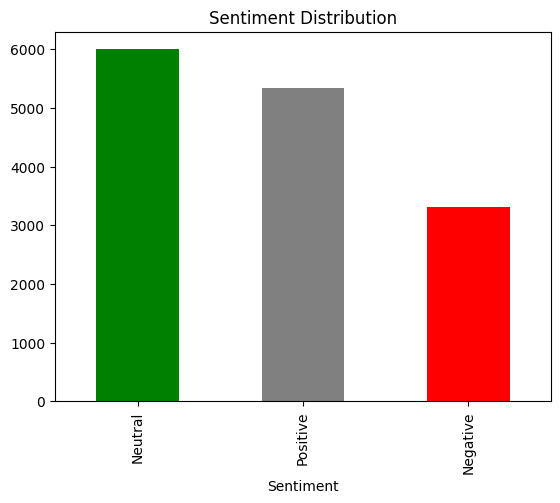

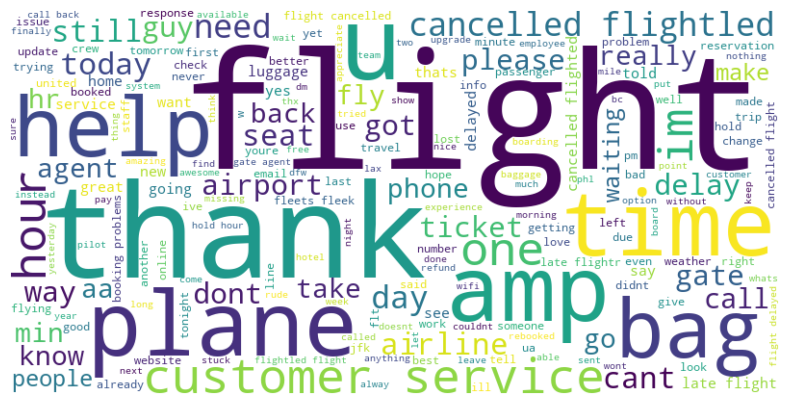

In [17]:
# Bar chart for sentiment
data["Sentiment"].value_counts().plot(kind="bar", color=["green", "gray", "red"])
plt.title("Sentiment Distribution")
plt.show()

# Word cloud for keywords
all_words = " ".join(data["Cleaned_Tweet"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

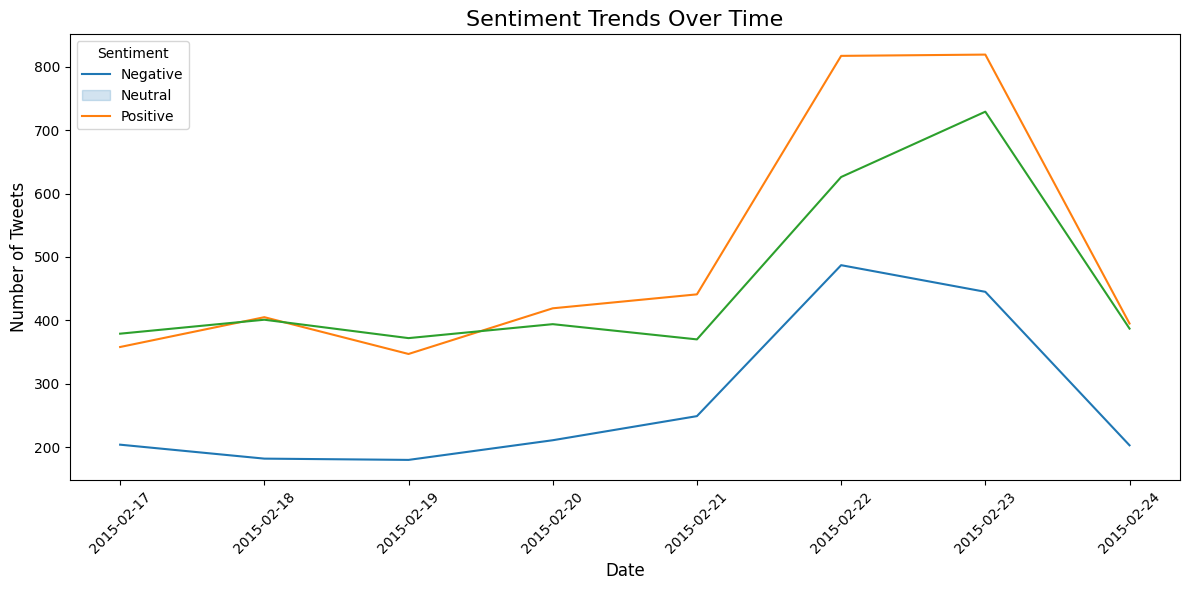

In [18]:
# Extract the date part of 'tweet_created_central'
data['date'] = data['tweet_created_central'].dt.date  

# Group by date and sentiment, and count how many tweets fall into each category
sentiment_trends = data.groupby(['date', 'Sentiment']).size().reset_index(name='count')

# Pivot the data so that we have sentiments as columns and dates as rows
sentiment_trends_pivot = sentiment_trends.pivot(index='date', columns='Sentiment', values='count').fillna(0)

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_trends_pivot, dashes=False)

# Customize the plot
plt.title('Sentiment Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'], loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

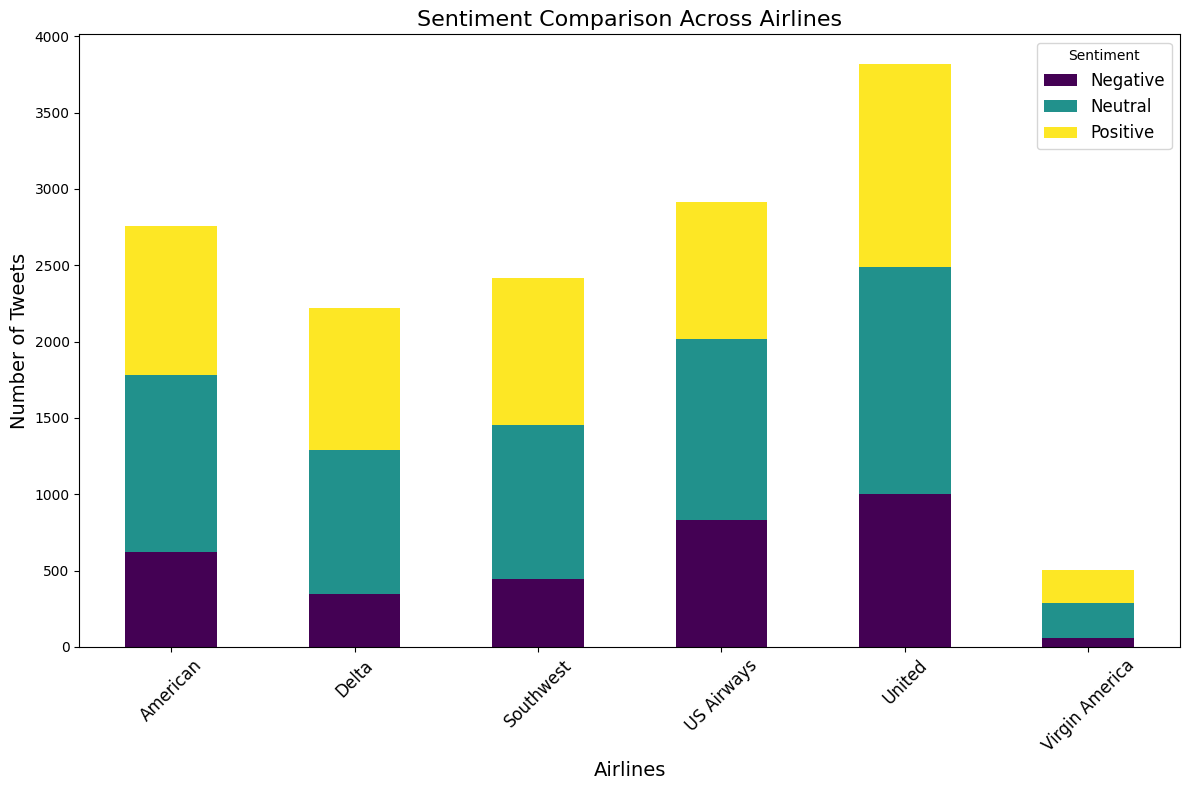

In [19]:
# Step 1: Group by airline and sentiment
airline_sentiment_counts = data.groupby(['airline', 'Sentiment']).size().reset_index(name='Count')

# Step 2: Create a pivot table for easier visualization
pivot_table = airline_sentiment_counts.pivot(index='airline', columns='Sentiment', values='Count').fillna(0)

# Step 3: Plot the data
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Add chart details
plt.title('Sentiment Comparison Across Airlines', fontsize=16)
plt.xlabel('Airlines', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Sentiment", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

## **7. Tools and Technologies**
- **Programming Languages**: Python
- **Libraries**: Pandas, Matplotlib, Seaborn, TextBlob, NLTK, Pytz, Numpy, datetime, stopwords, word_tokenize, WordCloud
- **Visualization Tools**: Power BI, Python
- **Data Sources**: Pre-existing datasets. To view [Click Here](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)

In [ ]:
## **8. Recommendations**
- Address common negative themes, such as delays and poor customer service.
- Promote positive experiences, like staff friendliness and efficient travel processes.
- Engage with customers on social media to improve sentiment.

In [ ]:
## **9. Project Files**
- **Notebook**: `Tweet_trends.ipynb`
- **Power BI Dashboard**: `Twtitter Sentiment Dashboard.pbix`
- **Dataset**: `Tweets.csv`

In [20]:
data.to_csv('tweets_data.csv', index=False)